In [72]:
import torch
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import unittest

%matplotlib inline
%load_ext autoreload
%autoreload 2

plt.rcParams.update({'font.size': 12})
torch.random.manual_seed(1904)
test = unittest.TestCase()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


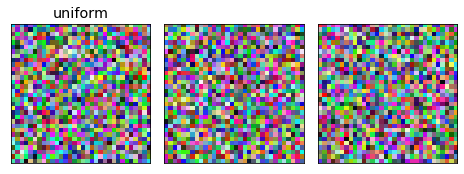

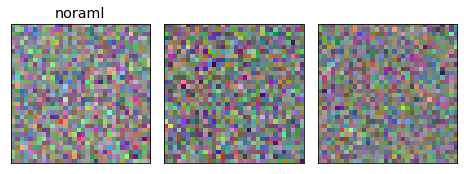

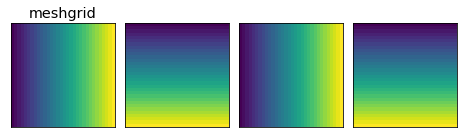

In [73]:
# Testing input generation
import utils
import input_gen as in_gen

# Uniform noise
imgs = []
uniform_noise = in_gen.get_noise(3, 32, 32, 'noise', 'uniform')
imgs.append(uniform_noise)
uniform_noise = in_gen.get_noise(3, 32, 32, 'noise', 'uniform')
imgs.append(uniform_noise)
uniform_noise = in_gen.get_noise(3, 32, 32, 'noise', 'uniform')
imgs.append(uniform_noise)
fig, axes = utils.tensors_as_images(imgs, titles=['uniform'])

# Normal noise
imgs = []
normal_noise = in_gen.get_noise(3, 32, 32, 'noise', 'normal')
imgs.append(normal_noise)
normal_noise = in_gen.get_noise(3, 32, 32, 'noise', 'normal')
imgs.append(normal_noise)
normal_noise = in_gen.get_noise(3, 32, 32, 'noise', 'normal')
imgs.append(normal_noise)
fig, axes = utils.tensors_as_images(imgs, titles=['noraml'])

# Meshgrid
imgs = []
meshgrid_input = in_gen.get_noise(3, 32, 32, 'meshgrid')
imgs.append(meshgrid_input[0].unsqueeze(dim=0))
imgs.append(meshgrid_input[1].unsqueeze(dim=0))
meshgrid_input = in_gen.get_noise(3, 32, 32, 'meshgrid')
imgs.append(meshgrid_input[0].unsqueeze(dim=0))
imgs.append(meshgrid_input[1].unsqueeze(dim=0))
fig, axes = utils.tensors_as_images(imgs, titles=['meshgrid'])



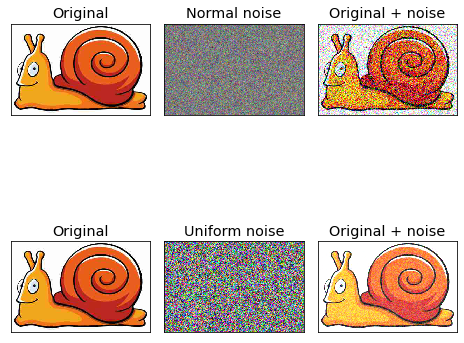

In [106]:
# Testing adding noise to image
from utils import *
from input_gen import add_noise_to_tensor
fname = 'data/denoising/snail.jpg'

img_pil = get_image(fname, -1)[0]
img_np = pil_to_np(img_noisy_pil)
img_tr = torch.from_numpy(img_noisy_np)
img_noisy_normal, normal_noise = add_noise_to_tensor(img_tr, 'normal', std=0.3)
img_noisy_uniform, uniform_noise = add_noise_to_tensor(img_tr, 'uniform', std=0.3)
fig, axes = utils.tensors_as_images([img_tr, normal_noise, img_noisy_normal, img_tr,
                                     uniform_noise, img_noisy_uniform], 
                                    titles=['Original', 'Normal noise', 'Original + noise',
                                            'Original', 'Uniform noise', 'Original + noise'], nrows=2,
                                   hspace=0)